<a href="https://colab.research.google.com/github/Krishna737Sharma/MP-Neuron-Model-and-Logic-Gate-Implementation/blob/main/Assignment_soln_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# MP Neuron Model
def mp_neuron(inputs,threshold,inhibitory_indices=[]):
  net_input=np.sum(inputs)
  for idx in inhibitory_indices:
    net_input -= inputs[idx]
    if inputs[idx]>=0.5:
      return 0
  return 1 if net_input>= threshold else 0

In [ ]:
# Boolean Functions
## AND Function
def and_function(x1,x2):
  return mp_neuron(np.array([x1,x2]),2)

## OR Function
def or_function(x1,x2):
  return mp_neuron(np.array([x1,x2]),1)

## NOT Function using inhibitory input
def not_function(x1):
  return mp_neuron(np.array([x1]),-np.inf,inhibitory_indices=[0])

# **Task-1**

In [ ]:
def nand_function(x1, x2):
    # NAND is opposite of AND, so we can use NOT(AND)
    and_op=and_function(x1,x2)
    return not_function(and_op)

In [ ]:
# Test cases for NAND
inputs_NAND = [[0, 0],[0, 1],[1, 0],[1, 1]]
ground_truth_NAND = [1,1,1,0]

outputs_NAND=[]
for input in inputs_NAND:
    outputs_NAND.append(nand_function(input[0],input[1]))

print("Inputs for NAND")
print(inputs_NAND)
print("Ground Truth for NAND")
print(ground_truth_NAND)
print("Outputs for NAND")
print(outputs_NAND)

Inputs for NAND
[[0, 0], [0, 1], [1, 0], [1, 1]]
Ground Truth for NAND
[1, 1, 1, 0]
Outputs for NAND
[1, 1, 1, 0]


Here 2 MP neuron is used

# **Task-2**

In [ ]:
# NOR Gate Implementation
def nor_function(x1, x2):
    # We can do this with a single MP neuron by adjusting the threshold
    return mp_neuron(np.array([x1,x2]), -np.inf ,[0,1])

In [ ]:
# Test cases for NOR
inputs_NOR = [[0, 0], [0, 1], [1, 0], [1, 1]]
ground_truth_NOR = [1, 0, 0, 0]

outputs_NOR = []
for input in inputs_NOR:
    outputs_NOR.append(nor_function(input[0], input[1]))

print("Inputs for NOR")
print(inputs_NOR)
print("Ground Truth for NOR")
print(ground_truth_NOR)
print("Outputs for NOR")
print(outputs_NOR)

Inputs for NOR
[[0, 0], [0, 1], [1, 0], [1, 1]]
Ground Truth for NOR
[1, 0, 0, 0]
Outputs for NOR
[1, 0, 0, 0]


Here only single MP neuron used

# **Task-3**

In [ ]:
## XOR Function
# Here POS form of XOR gate is used for reducing no. of gate to 4
def xor_function(x1, x2):
    or_output = or_function(x1, x2)          # A OR B
    nand_output = nand_function(x1, x2)       # A AND B
    return and_function(or_output, nand_output)  # (A OR B) AND NOT (A AND B)

In [ ]:
# Test cases for XOR
inputs_XOR = [[0, 0], [0, 1], [1, 0], [1, 1]]
ground_truth_XOR = [0, 1, 1, 0]

outputs_XOR = []
for input in inputs_XOR:
    outputs_XOR.append(xor_function(input[0], input[1]))

print("Inputs for XOR")
print(inputs_XOR)
print("Ground Truth for XOR")
print(ground_truth_XOR)
print("Outputs for XOR")
print(outputs_XOR)

Inputs for XOR
[[0, 0], [0, 1], [1, 0], [1, 1]]
Ground Truth for XOR
[0, 1, 1, 0]
Outputs for XOR
[0, 1, 1, 0]


Here 4 MP neuron used

# **Task-4**

In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(function_name, logic_function):
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    outputs = np.array([logic_function(x[0], x[1]) for x in inputs])

    # Generate grid points
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    Z = np.array([logic_function(xi, yi) for xi, yi in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6, 6))
    disp = DecisionBoundaryDisplay(xx0=xx, xx1=yy, response=Z)
    disp.plot(cmap=plt.cm.Paired, alpha=0.5)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, edgecolor="k", cmap=plt.cm.Paired)
    plt.title(f"MP-Neuron: {function_name} Decision Boundary")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

<Figure size 600x600 with 0 Axes>

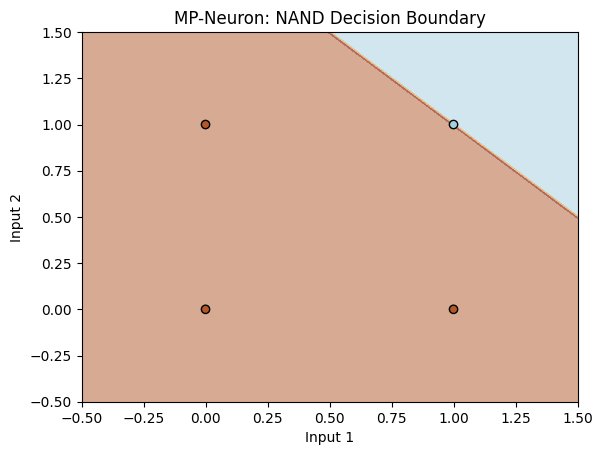

In [ ]:
# Plot decision boundaries for NAND
plot_decision_boundary("NAND", nand_function)

Decision boundary is a straight line because the function is a simple negation of AND. A straight line separates the region where both inputs are 1 (output 0) from all other combinations (output 1). and it is just opposite to AND decision boundary as we see in class.

<Figure size 600x600 with 0 Axes>

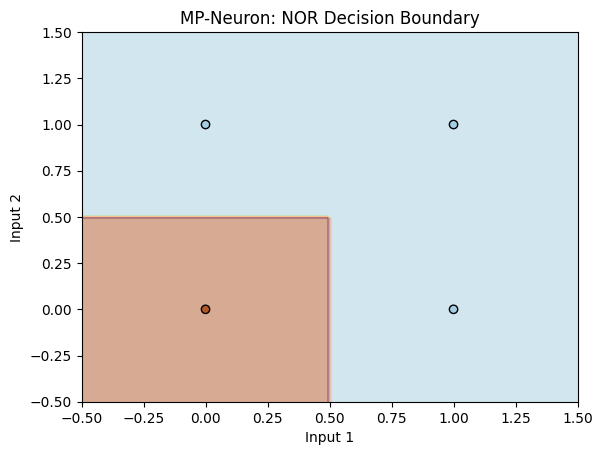

In [ ]:
# Plot decision boundaries for NOR
plot_decision_boundary("NOR", nor_function)

Decision boundary is a rectangular shape because the (0,0) input giving true value which is seperated by remaining inputs from 0.5 because of inhibitors value is >=0.5 So, less than that all inputs showing true

<Figure size 600x600 with 0 Axes>

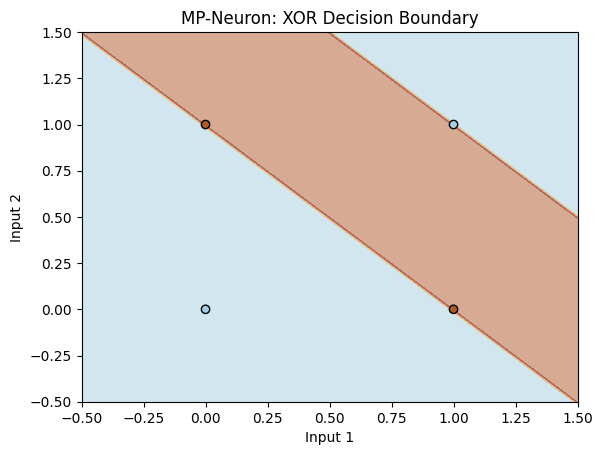

In [ ]:
# Plot decision boundaries for XOR
plot_decision_boundary("XOR", xor_function)

Desion boundary is like 2 parallel path because XOR is not linearly separable because no single straight line can separate the 1 outputs from the 0 outputs in the input space. This requires at least two linear boundaries combined, leading to a non-linear decision boundary.

# **Task-5**

In [ ]:
def xor_n_input(x):
    """
    Implements n-input XOR using the given MP neuron function.
    Returns 1 when there are an odd number of 1s in the input.
    """
    x = np.array(x)
    if len(x) == 1:
      return x
    if len(x) == 2:
      return (xor_function(x[0], x[1]))
    return xor_n_input(np.array([x[-1],xor_n_input(x[:-1])]))

In [ ]:
# Test cases for 3-input XOR

for i in range(2):
  for j in range(2):
    for k in range(2):
      print('XOR(',i,',',j,',',k,') = ',xor_n_input(np.array([i,j,k])))

XOR( 0 , 0 , 0 ) =  0
XOR( 0 , 0 , 1 ) =  1
XOR( 0 , 1 , 0 ) =  1
XOR( 0 , 1 , 1 ) =  0
XOR( 1 , 0 , 0 ) =  1
XOR( 1 , 0 , 1 ) =  0
XOR( 1 , 1 , 0 ) =  0
XOR( 1 , 1 , 1 ) =  1


In [ ]:
# Test cases for 4-input XOR

for i in range(2):
  for j in range(2):
    for k in range(2):
      for l in range(2):
        print('XOR(',i,',',j,',',k,',',l,') = ',xor_n_input(np.array([i,j,k,l])))

XOR( 0 , 0 , 0 , 0 ) =  0
XOR( 0 , 0 , 0 , 1 ) =  1
XOR( 0 , 0 , 1 , 0 ) =  1
XOR( 0 , 0 , 1 , 1 ) =  0
XOR( 0 , 1 , 0 , 0 ) =  1
XOR( 0 , 1 , 0 , 1 ) =  0
XOR( 0 , 1 , 1 , 0 ) =  0
XOR( 0 , 1 , 1 , 1 ) =  1
XOR( 1 , 0 , 0 , 0 ) =  1
XOR( 1 , 0 , 0 , 1 ) =  0
XOR( 1 , 0 , 1 , 0 ) =  0
XOR( 1 , 0 , 1 , 1 ) =  1
XOR( 1 , 1 , 0 , 0 ) =  0
XOR( 1 , 1 , 0 , 1 ) =  1
XOR( 1 , 1 , 1 , 0 ) =  1
XOR( 1 , 1 , 1 , 1 ) =  0
